In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv').drop(columns='Unnamed: 0')
data

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [3]:
data_new = data.drop(columns=['Address','Zip'])
data_new

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


In [4]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [5]:
data_new.dropna(inplace=True)

In [6]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    920 non-null    int64  
 2   Room    920 non-null    int64  
 3   Lon     920 non-null    float64
 4   Lat     920 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 43.1 KB


In [7]:
data_new.corr()

,Price,Area,Room,Lon,Lat
Price,1.000000,0.835090,0.623448,-0.013561,0.062196
Area,0.835090,1.000000,0.808285,0.021762,0.014179
Room,0.623448,0.808285,1.000000,-0.025753,-0.021168
Lon,-0.013561,0.021762,-0.025753,1.000000,-0.183445
Lat,0.062196,0.014179,-0.021168,-0.183445,1.000000


<AxesSubplot:>

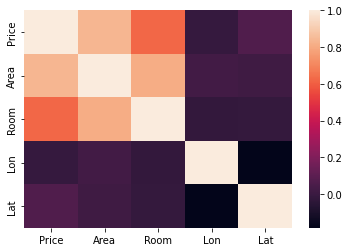

In [8]:
sns.heatmap(data_new.corr())

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new[['Area','Room','Lon','Lat']], data_new['Price'], train_size=0.8)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled,y_train)

print(model.intercept_)
print(model.coef_)

622067.8138586949
[510818.09502791 -78224.45695277 -20002.73462644  20792.63067937]


In [12]:
import pandas as pd

metric = pd.DataFrame()
metric['models'] = ['OLR','Poly3','OLR_reg','Poly3_reg']
r2_train = []
r2_test = []

## Ordinary Linear Regression

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 174822.17541084054
MSE: 79136652732.39824
RMSE: 281312.37571852084
R^2 score: 0.7191581286536377
-------- TEST ---------
MAE: 184117.2073344255
MSE: 107981406713.96402
RMSE: 328605.24450161174
R^2 score: 0.6665800319190851


## Polynomial Features 3-degree Linear Regression

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled,y_train)

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 117561.75022752206
MSE: 43301177026.13434
RMSE: 208089.34866094022
R^2 score: 0.8463318428612143
-------- TEST ---------
MAE: 138029.20184436286
MSE: 77252823411.13136
RMSE: 277943.9213422941
R^2 score: 0.7614623230077904


## Ordinary Linear Regression + Regularization

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=10, fit_intercept=True)
model.fit(X_train_scaled,y_train)

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 174080.4889708902
MSE: 79297789014.70882
RMSE: 281598.63105972094
R^2 score: 0.7185862847165567
-------- TEST ---------
MAE: 183565.24651074296
MSE: 109158429563.761
RMSE: 330391.32791851694
R^2 score: 0.6629456754779863


## Polynomial Features 3-degree Linear Regression + Regularization

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = Ridge(alpha=10,fit_intercept=True)
model.fit(X_train_scaled,y_train)

print('-------- TRAIN ---------')
y_pred = model.predict(X_train_scaled)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',mean_squared_error(y_train,y_pred,squared=False))
print('R^2 score:',r2_score(y_train,y_pred))
r2_train.append(r2_score(y_train,y_pred))

print('-------- TEST ---------')
y_pred = model.predict(X_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R^2 score:',r2_score(y_test,y_pred))
r2_test.append(r2_score(y_test,y_pred))

-------- TRAIN ---------
MAE: 162593.1540776688
MSE: 75336215640.00742
RMSE: 274474.43531230267
R^2 score: 0.7326452023181043
-------- TEST ---------
MAE: 167978.18371974028
MSE: 93711457309.95325
RMSE: 306123.2714282814
R^2 score: 0.7106421183429533


In [17]:
metric['R2_Train'] = r2_train
metric['R2_Test'] = r2_test

metric

,models,R2_Train,R2_Test
0,OLR,0.719158,0.666580
1,Poly3,0.846332,0.761462
2,OLR_reg,0.718586,0.662946
3,Poly3_reg,0.732645,0.710642


# Logistic Regression

In [18]:
data_log = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/dementia_dataset.csv')
data_log = data_log[data_log['Group'] != 'Converted']
data_log

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [19]:
data_log.dropna(inplace=True)
data_log

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [20]:
new_data_log = data_log.drop(columns=['Subject ID', 'MRI ID'])
new_data_log

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [21]:
new_data_log.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1.867508,581.457413,76.716088,14.615142,2.545741,27.261830,0.272871,1493.577287,0.730596,1.191606
std,0.911313,622.527867,7.805071,2.926876,1.123099,3.861227,0.382144,179.719079,0.038102,0.139663
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.000000,0.700000,1.098000
50%,2.000000,539.000000,76.000000,15.000000,2.000000,29.000000,0.000000,1476.000000,0.732000,1.189000
75%,2.000000,854.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1599.000000,0.757000,1.293000
max,5.000000,2517.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Preprocessing data numerik

In [22]:
data_num = new_data_log[new_data_log.describe().columns]
data_cat = new_data_log[['M/F', 'Hand']]
y = new_data_log['Group'].replace({'Nondemented':0, 'Demented':1})
#y = new_data_log['Group'].replace

In [23]:
data_num.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [24]:
from scipy.stats import ttest_ind

# H0  : Tidak ada perbedaan yg signifikan antara dimentia dan non dimentia terhadap suatu kolom
# H1 : Ada perbedaan yg signifikan antara dimentia dan non dimentia terhadap suatu kolom

label1_id = np.where(y==1)[0]
label0_id = np.where(y==0)[0]

t, p_val = ttest_ind(data_num.iloc[label1_id], data_num.iloc[label0_id])

p_val_num = pd.DataFrame({'COLS':data_num.columns, 'P-Value':p_val})
drop_cols = p_val_num[p_val_num['P-Value']>0.05]


In [25]:
data_num_new = data_num.drop(columns=drop_cols['COLS'])
data_num_new.head()

,Visit,MR Delay,EDUC,SES,MMSE,CDR,nWBV
0,1,0,14,2.0,27.0,0.0,0.696
1,2,457,14,2.0,30.0,0.0,0.681
5,1,0,18,3.0,28.0,0.0,0.710
6,2,538,18,3.0,27.0,0.0,0.718
7,1,0,12,4.0,28.0,0.0,0.712


### Preprocess data kategorik

In [26]:
data_cat.head()

,M/F,Hand
0,M,R
1,M,R
5,F,R
6,F,R
7,M,R


In [27]:
print(data_cat['M/F'].unique())
print(data_cat['Hand'].unique())

['M' 'F']
['R']


In [28]:
from scipy.stats import chi2_contingency

# H0 : kolom dan label tidak berkaitan
# H1 : kolom dan label berkaitan

p_val = []
for col in data_cat.columns:
    contigency_table =pd.crosstab(data_cat[col], y)
    stat, p, dof, expected = chi2_contingency(contigency_table)
    p_val.append(p)

p_val_cat = pd.DataFrame({'COLS':data_cat.columns, 'P-Value':p_val})
drop_cols = p_val_cat[p_val_cat['P-Value'] > 0.05]
drop_cols

,COLS,P-Value
1,Hand,1.0


In [29]:
p_val_cat


,COLS,P-Value
0,M/F,0.000002
1,Hand,1.000000


In [30]:
new_data_cat = data_cat['M/F'].replace({'M':1,'F':0})
new_data_cat.head()

0    1
1    1
5    0
6    0
7    1
Name: M/F, dtype: int64

In [31]:
X = pd.concat([data_num_new,new_data_cat],axis=1)
X

,Visit,MR Delay,EDUC,SES,MMSE,CDR,nWBV,M/F
0,1,0,14,2.0,27.0,0.0,0.696,1
1,2,457,14,2.0,30.0,0.0,0.681,1
5,1,0,18,3.0,28.0,0.0,0.710,0
6,2,538,18,3.0,27.0,0.0,0.718,0
7,1,0,12,4.0,28.0,0.0,0.712,1
...,...,...,...,...,...,...,...,...
368,2,842,16,1.0,28.0,0.5,0.694,1
369,3,2297,16,1.0,26.0,0.5,0.675,1
370,1,0,13,2.0,30.0,0.0,0.801,0
371,2,763,13,2.0,30.0,0.0,0.796,0


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2',C=0.01,solver='newton-cg')

model.fit(X_train_scaled,y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [34]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score

print('Accuracy Train:',accuracy_score(y_train,y_pred_train))
print('Accuracy Test:',accuracy_score(y_test,y_pred_test))

Accuracy Train: 0.8774703557312253
Accuracy Test: 0.90625


In [36]:
print('Score Train:',model.score(X_train_scaled, y_train))
print('Score Test:',model.score(X_test_scaled, y_test))

Score Train: 0.8774703557312253
Score Test: 0.90625


### Model Inference

In [37]:
data_sample = X.sample(1)
data_sample

,Visit,MR Delay,EDUC,SES,MMSE,CDR,nWBV,M/F
241,1,0,20,2.0,30.0,0.0,0.758,1


In [38]:
data_inference = scaler.transform(data_sample)

print('Label:',model.predict(data_inference))

Label: [0]
